# Лабораторная работа №1: Моделирование стандартных дискретных сигналов

Выполнили студенты гр. 9382 Павлов Роман и Поплавский Иван. Вариант №8

## Цель работы

Изучить математическое описание стандартных дискретных сигналов и овладеть программными средствами их моделирования.

## Основные теоретические положения

<b>Дискретизация</b> - определение моментов времени, в которые производятся отсчёты и отслеживается значение сигнала.

<b>Период дискретизации</b> $T$ - временной промежуток, через который берутся эти моменты времени.

<b>Частота дискретизации</b> $f_d$ - величина, обратная периоду дискретизации: $f_d = \frac{1}{T}$.

\
<b>Дискретное время</b> - временной интервал, на котором отсчёты берутся по прошествии $T$ : $nT, n \in \{0, .. ,N-1\}$.

<b>Дискретное нормированное время</b> - интервал, на котором $T = 1$, т.е. отсчёты - это целые числа $n, n \in \{0, .. ,N-1\}$.

\
<b>Единичный цифровой имульс</b> имеет следующую функцию:\
\
$\begin{equation}
    \delta_d(k) =
        \begin{cases}
        1, k = 0\\
        0, k \ne 0
        \end{cases}
 \end{equation}
$, $k \in \mathbb{Z}$

ЕЦИ является цифровым аналогом функции Дирака:\
\
$\begin{equation}
    \delta(t) =
        \begin{cases}
        \infty, t = 0\\
        0, t \ne 0
        \end{cases}
 \end{equation}
$, $t \in \mathbb{R}$

\
<b>Дискретный единичный скачок</b> определяется как\
\
$\begin{equation}
    \sigma_d(k) =
        \begin{cases}
        1, k \ge 0\\
        0, k < 0
        \end{cases}
 \end{equation}
$, $k \in \mathbb{Z}$

и является аналогом функции Хэвисайда единичного скачка:\
\
$\begin{equation}
    \delta(t) =
        \begin{cases}
        1 & \text{,t > 0}\\
        0.5\ (or\ not\ defined)& \text{,t = 0}\\
        0 & \text{,t < 0}
        \end{cases}
 \end{equation}
$, $t \in \mathbb{R}$.

\
<b>Дискретная экспоненциальная функция</b>:\
\
$\begin{equation}
    s(k) =
        \begin{cases}
        0, k < 0\\
        a^k, k \ge 0
        \end{cases}
 \end{equation}
$, $k \in \mathbb{Z}$
, где a - известная экспонента.

\
<b>Дискретный комплексный гармонический сигнал</b> - это сигнал с двумя компонентами, представляемый в виде:\
\
$s(k) = C\large e^{j \hat w_0 k} \normalsize = Ccos(\hat w_0 k) + Cjsin(\hat w_0 k)$,\
\
где $C$ - амплитуда сигнала, а $\hat w_0$ - его угловая частота, равная $2\pi f_d$

## Постановка задачи

С помощью программных средств провести моделирование и анализ стандартных дискретных последовательностей. Результаты подкрепить соответствующими графиками и выводами.

## Выполнение работы

$N_b = 8$

Объявлены значения параметров в соответствии с номером варианта.
Интервалы дискретного и нормированного дискретного времени расширены на $2T$ и $2$ соответственно включением отрицательных значений для наглядности графиков.

In [1]:
from cmath import exp
from math import sin, cos, pi
import numpy as np
import matplotlib.pyplot as plt

Nb = 8    # Номер бригады
N = 30 + Nb%5    # Длина последовательности
T = 0.0005 * (1 + Nb%3)    # Период дискретизации
a = (-1)**Nb * (0.8 + 0.005*Nb)    # Основание экспоненты
C = 1 + Nb%5    # Амплитуда гармонического сигнала
w0 = pi/(6 + Nb%5)    # Частота гармонического сигнала
m = 5 + Nb%5    # Задержка

nT = np.linspace(-2*T, (N - 1)*T, (N+2))    # Интервал дискретного времени
n = np.arange(-2, N)    # Интервал дискретного нормированного времени

1.Задана функция $\delta_d(k)$ - функция единичного цифрового импульса, сгенерированы наборы значений этой функции на имеющихся временных интервалах:

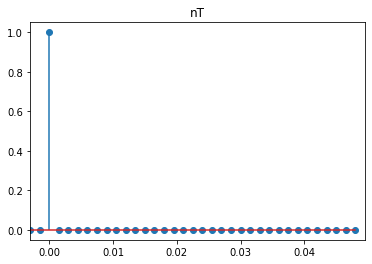

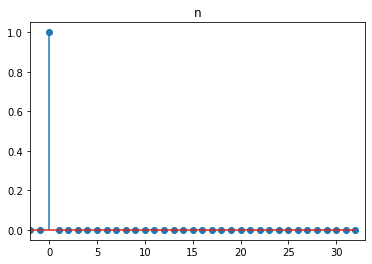

In [2]:
delta_d = lambda x: 1 if x == 0 else 0
delta_d_vals_nT = np.array([delta_d(i) for i in nT])
delta_d_vals_n = np.array([delta_d(i) for i in n])

plt.stem(nT, delta_d_vals_nT)
plt.xlim([-2*T, N*T])
plt.title("nT")
plt.show()

plt.stem(n, delta_d_vals_n)
plt.xlim([-2, N])
plt.title("n")
plt.show()

Как видно из графиков выше, цифровой единичный импульс принимает значение 1 только в точке 0 как на интервале дискретного, так и на интервале дискретного нормированного времени.

Дискретное время зависит от дискретного нормированного следующим образом:

$nT$, где $T$ - период дискретизации, а $n \in \{0, .. ,N - 1\}$ - отсчёты времени без учёта периода дискретизации ($T$ полагается равным единице).

И дельта-функция, и функция цифрового импульса имеют ненулевое значение в точке $0$. Различие состоит в том, что первая определена на множестве вещественных чисел и в точке $0$ имеет значение $\infty$, а последняя определена на множестве целых чисел и принимает значение $1$ в нуле.

2.Задана функция $\sigma_d(k)$ дискретного единичного скачка, для неё также сгенерированы наборы значений:

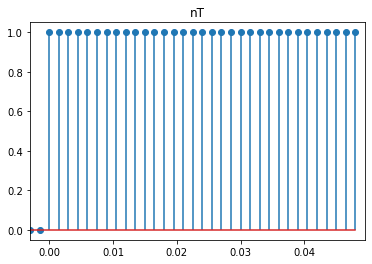

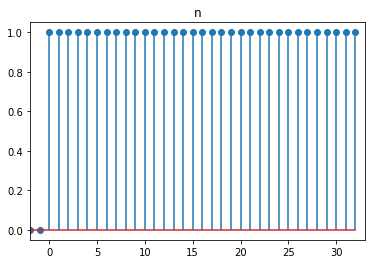

In [3]:
sigma_d = lambda x: 1 if x >= 0 else 0
sigma_d_vals_nT = np.array([sigma_d(i) for i in nT])
sigma_d_vals_n = np.array([sigma_d(i) for i in n])

plt.stem(nT, sigma_d_vals_nT)
plt.xlim([-2*T, N*T])
plt.title("nT")
plt.show()

plt.stem(n, sigma_d_vals_n)
plt.xlim([-2, N])
plt.title("n")
plt.show()

Как и функция Хэвисайда, определённая на $\mathbb{R}$, дискретный скачок, определённый на $\mathbb{Z}$, на положительных значениях принимает значение $1$, а на отрицательных - $0$.
Однако в то время, как дискретный скачок имеет вполне определённое значение в нуле - единицу, функция Хэвисайда в данной точке считается равной $0.5$ или не определённой вовсе.

Частота дискретизации $f_d$ - величина, обратная периоду дискретизации: $f_d = \large\frac{1}{T}$. Для единичного скачка на интервалах $nT$ и $n$ частота дискретизации будет равна соответственно $666.(6)$ Гц и $1$ Гц.

3.Смоделирована дискретная экспоненциальная функция $s_1(k)$:

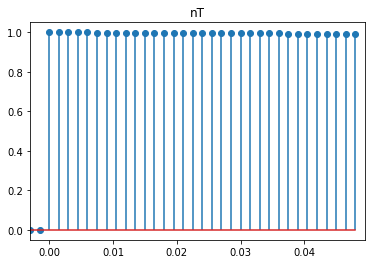

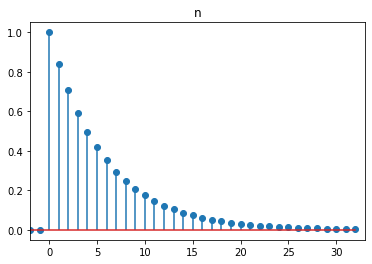

In [4]:
s1 = lambda x: a**x if x >= 0 else 0
s1_vals_nT = np.array([s1(i) for i in nT])
s1_vals_n = np.array([s1(i) for i in n])

plt.stem(nT, s1_vals_nT)
plt.xlim([-2*T, N*T])
plt.title("nT")
plt.show()

plt.stem(n, s1_vals_n)
plt.xlim([-2, N])
plt.title("n")
plt.show()

Дискретная экспонента имеет значения только в точках дискретизации, т.е. является подмножеством множества точек аналоговой экспоненты с основанием $a$.
На первом графике убывание значения экспоненциальной функции почти не заметно - это связано с тем, что дискретное время на нём не нормировано, т.к. период дискретизации заметно меньше единицы:

$0.0015 < 1$.

В связи с этим масштаб графика не позволяет отчётливо проследить изменение уровня сигнала.

4.Смоделирован дискретный комплексный гармонический сигнал $s_2(k) = C \large e^{j \hat w_0 k}$:

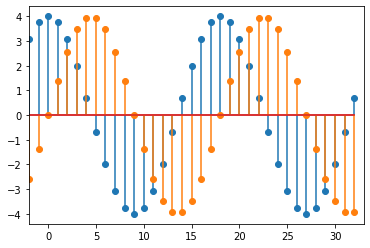

In [5]:
s2 = lambda x: C*exp(complex(0, w0*x))
s2_vals_n = np.array([s2(i) for i in n])

plt.stem(n, s2_vals_n.real, )
plt.stem(n, s2_vals_n.imag, linefmt="C1", markerfmt="C1o")
plt.xlim([-2, N])
plt.show()

График, приведённый выше, подтверждает корректность модели:

Амплитуда $C = 4$

Частота дискретизации $f_d = \large \frac{\hat w_0}{2\pi} = \frac{\pi}{9} * \frac{1}{2\pi} = \normalsize \frac{1}{18}$. Действительно, период сигнала равен 18 отсчётам, что видно на графике.

Данный сигнал можно записать в виде комбиинации двух вещественных последовательностей - $Ccos(\hat w_0 t)$ и $Csin(\hat w_0 t)$, где первая последовательность - его вещественная составляющая, а вторая - мнимая:

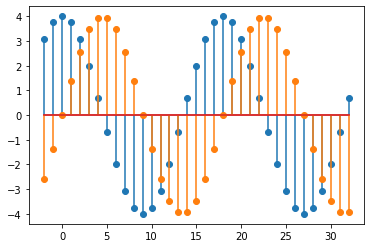

In [6]:
real = np.array([C*cos(w0*x) for x in n])
imaginary = np.array([C*sin(w0*x) for x in n])

plt.stem(n, real)
plt.stem(n, imaginary, linefmt="C1", markerfmt="C1o")
plt.show()

Графики, построенные по двум последовательностям вещественных чисел, соответствуют графикам вещественной и мнимой частей комплексного сигнала.

5.Осуществлена задержка сигналов $\delta_d(k)$, $\sigma_d(k)$ и $s_1(k)$ на $m$ отсчётов:

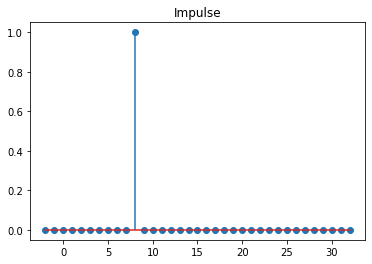

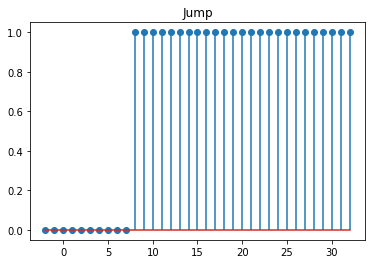

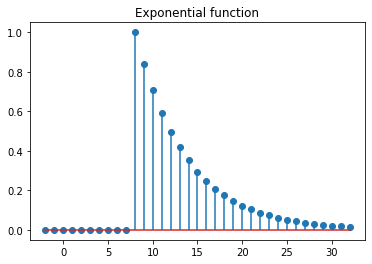

In [7]:
delta_d_vals_n_shifted = np.array([delta_d(i - m) for i in n])
sigma_d_vals_n_shifted = np.array([sigma_d(i - m) for i in n])
s1_vals_n_shifted = np.array([s1(i - m) for i in n])

plt.stem(n, delta_d_vals_n_shifted)
plt.title("Impulse")
plt.show()

plt.stem(n, sigma_d_vals_n_shifted)
plt.title("Jump")
plt.show()

plt.stem(n, s1_vals_n_shifted)
plt.title("Exponential function")
plt.show()

Сдвиг эквивалентен вычитанию величины сдвига $m$ из аргумента функции - таким образом, в точке, смещённой относительно нуля на $m$, параметр $k$ будет равен нулю, что даст проявление импульса, скачка или экспоненциальной функции именно в точке $m$.

Тогда формулы задержанных последовательностей будут иметь следующий вид:

$\delta_d(k - m)$

$\sigma_d(k - m)$

$s_1(k - m)$

## Выводы

В ходе работы были смоделированы стандартные дискретные последовательности: импульс, скачок, экспоненциальная функция, гармонический сигнал. Данные последовательности являются дискретными аналогами непрерывных сигналов (функций) и широко используются в цифровой обработке сигналов.

Комплексный сигнал может быть представлен двумя вещественными последовательностями, что облегчает обработку таких сигналов.

Сигналы могут быть задержаны путём вычитания из аргумента функции величины сдвига по времени $m$. В таком случае функция сигнала будет в точке $x$ принимать значение $f(x - m)$.